# Step 1 : Camera Caliberation

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from collections import deque
%matplotlib inline

In [37]:
def camera_calibration(image_list,nx=9,ny=6):
    objectPoints = np.zeros((6*9,3), np.float32)
    objectPoints[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    #image_list = glob.glob('camera_cal/calibration*.jpg')
    i =1
    for fname in image_list:
            #image_name = cal_image.split('/', 1 )[1]
            file_name='test'
            img = cv2.imread(fname)
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray_image, (nx,ny), None)
            # If found, add object points, image points
            if ret == True:
                objpoints.append(objectPoints)
                imgpoints.append(corners)
                # Draw and display the corners
                cv2.drawChessboardCorners(img, (9,6), corners, ret)
                f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
                ax1.imshow(cv2.cvtColor(mpimg.imread(fname), cv2.COLOR_BGR2RGB))
                ax1.set_title( str(i)+'. Original Image ('+file_name+')', fontsize=18)
                ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                ax2.set_title(str(i)+'Calibrated Image ( '+file_name+')', fontsize=18)
                i=i+1
            else:
                print("This image doesn't have the corner of (9,6)")
    return objpoints,imgpoints

This image doesn't have the corner of (9,6)
This image doesn't have the corner of (9,6)
This image doesn't have the corner of (9,6)


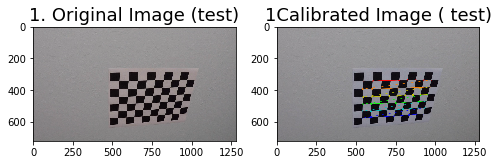

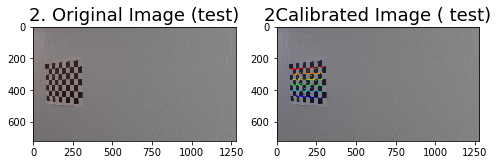

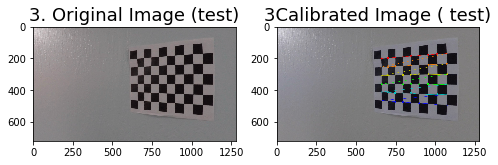

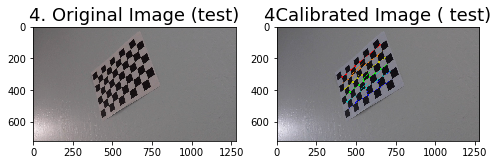

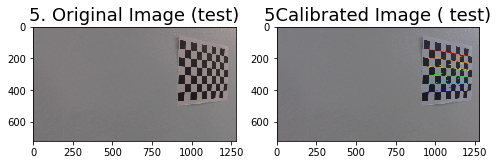

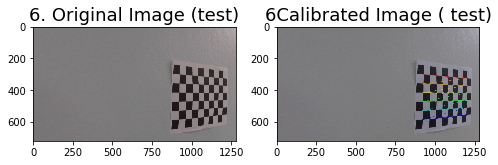

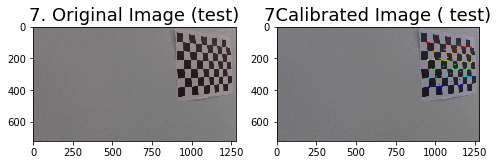

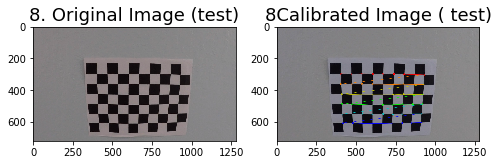

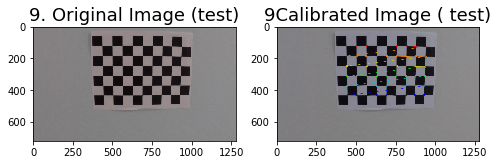

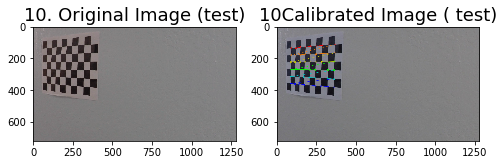

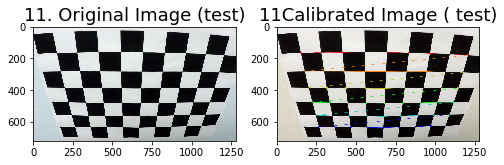

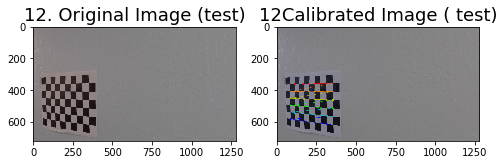

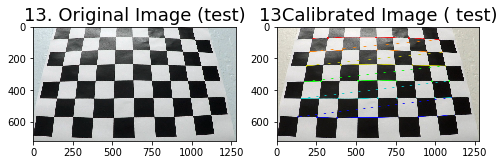

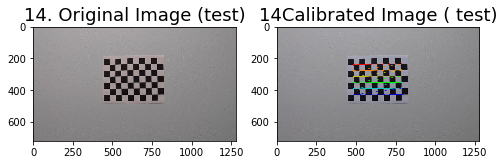

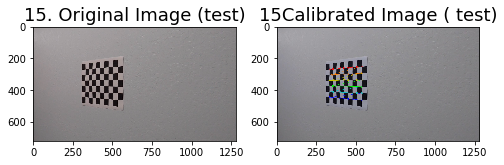

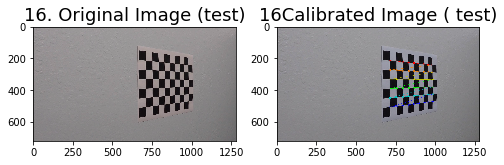

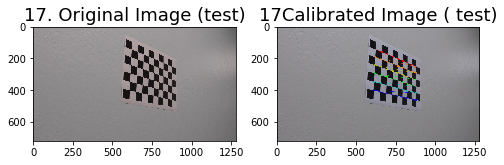

In [38]:
image_list = glob.glob('camera_cal/calibration*.jpg')
#image_name = image_list[3].split('/', 1 )[1]
#image_name = image_name.split('.', 1 )[0]

#name=image_list[1].split('/', 1 )
#name=name[1].split('.', 1 )
#print(name_f)
objpoints,imgpoints=camera_calibration(image_list,9,6)

# 2. Undistorting Image 

In [43]:
# Remove distortion from images
def remove_distortion(image,flag='True'):
    img = cv2.imread(image)
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    remove_dist = cv2.undistort(img, mtx, dist, None, mtx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,6))
    if flag:
        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(cv2.cvtColor(remove_dist, cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted Image', fontsize=20)
    else:
        return remove_dist

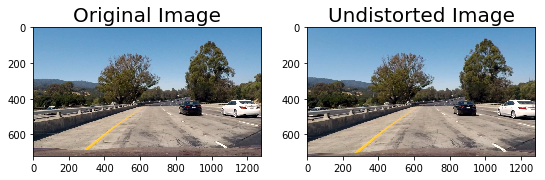

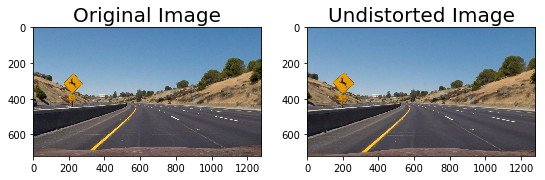

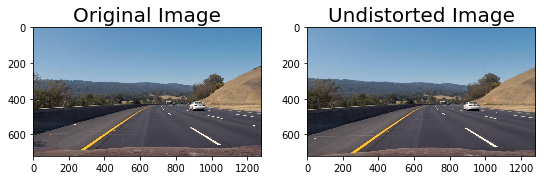

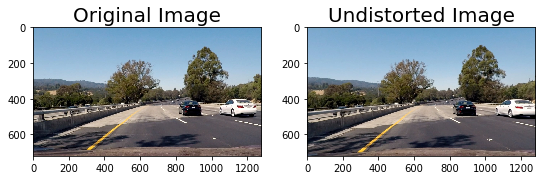

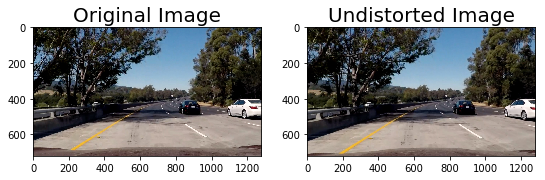

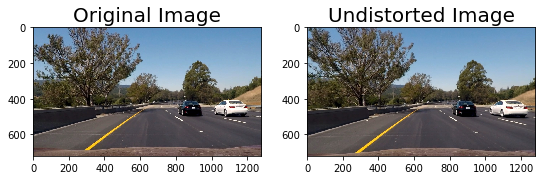

In [44]:
images = glob.glob('test_images/test*.jpg')
for image in images:
    remove_distortion(image,True)

# 3.Perspective Transform

In [47]:
def perspective_transform(img, display=True):
    remove_dist_img=remove_distortion(img, False) 
    img_size = (remove_dist_img.shape[1], remove_dist_img.shape[0])
    offset = 0
    src = np.float32([[490, 482],[810, 482],
                      [1250, 720],[40, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(remove_dist_img, M, img_size)
    if display:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
        f.tight_layout()
        ax1.imshow(cv2.cvtColor(remove_dist_img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Undistorted Image', fontsize=20)
        ax2.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted and Warped Image', fontsize=20)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    else:
        return warped, M

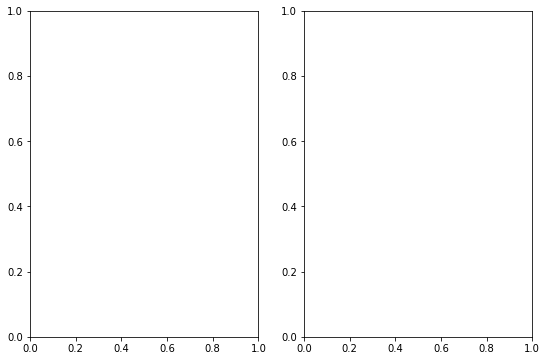

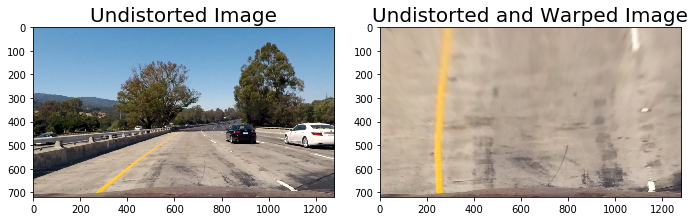

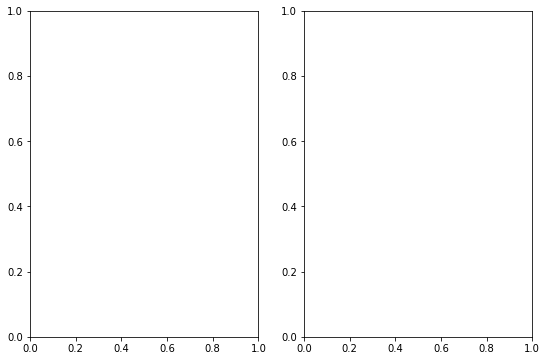

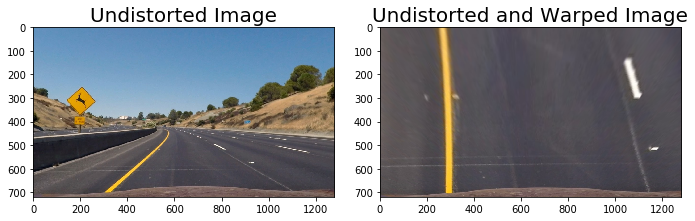

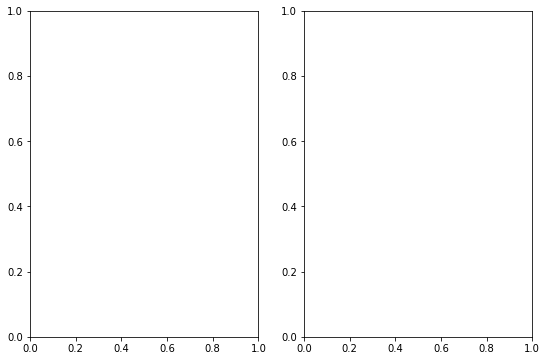

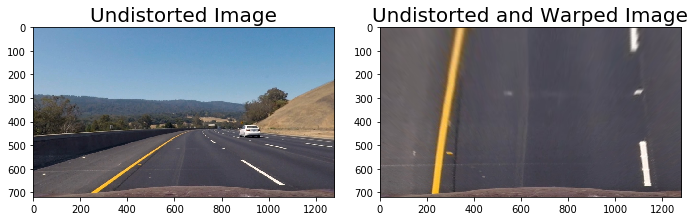

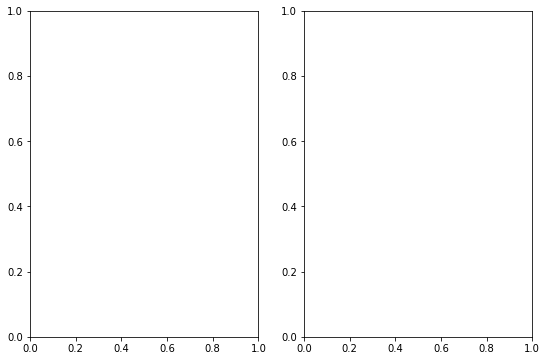

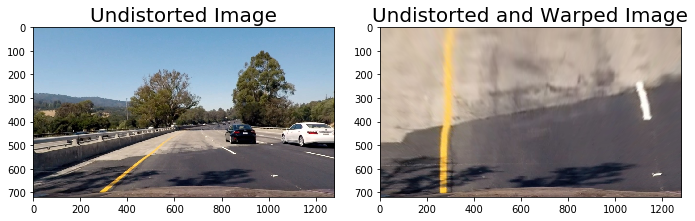

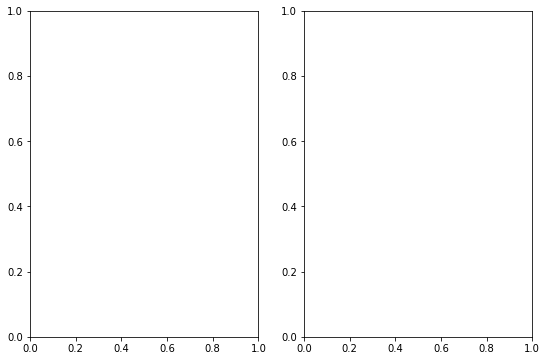

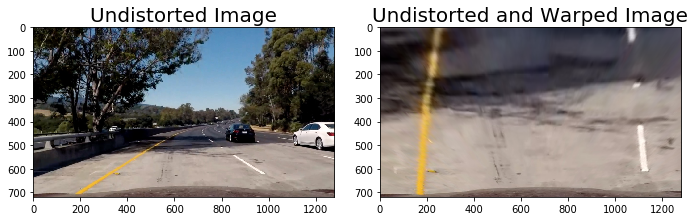

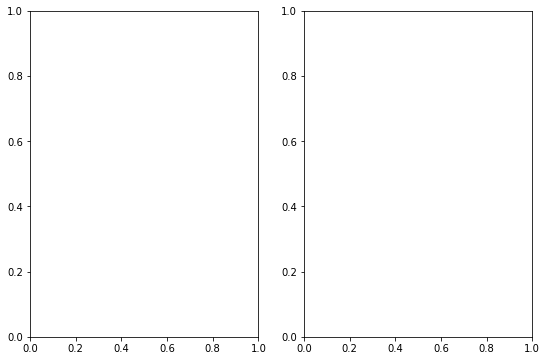

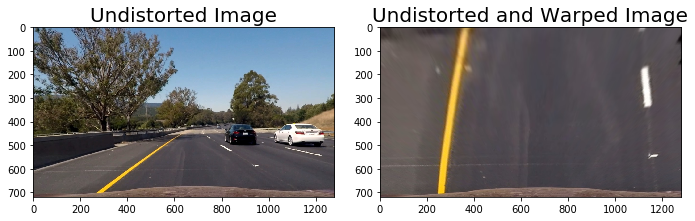

In [48]:
for image in images:
    perspective_transform(image)